# Santander Value Prediction Challenge

According to Epsilon research, 80% of customers are more likely to do business with you if you provide **personalized service**. Banking is no exception.

The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and **intends to determine the amount or value of the customer's transaction**. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before.

In this competition, **Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer**. This is a first step that Santander needs to nail in order to personalize their services at scale.

The evaluation metric for this competition is Root Mean Squared Logarithmic Error. **RMSLE**

**You are provided with an anonymized dataset containing numeric feature variables, the numeric target column, and a string ID column.**

**The task is to predict the value of target column in the test set**

## Load Required Libraries

In [36]:
# #Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels
import pandas_profiling

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import time
import json
import random
import requests
import datetime

import missingno as msno
import math
import sys
import gc
import os

# #sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor

# #sklearn - preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# #sklearn - metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

# #XGBoost & LightGBM
import xgboost as xgb
import lightgbm as lgb

# #Missing value imputation
from fancyimpute import KNN, MICE

# #Hyperparameter Optimization
from hyperopt.pyll.base import scope
from hyperopt.pyll.stochastic import sample
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

pd.options.display.max_columns = 150

## EDA

In [3]:
!ls ../

code
data
submissions


In [4]:
!ls ../data

sample_submission.csv
test.csv
train.csv


In [5]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

In [6]:
df_train.shape

(4459, 4993)

In [7]:
df_test.shape

(49342, 4992)

In [8]:
df_train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,11d86fa6a,77c9823f2,8d6c2a0b2,4681de4fd,adf119b9a,cff75dd09,96f83a237,b8a716ebf,6c7a4567c,4fcfd2b4d,f3b9c0b95,71cebf11c,d966ac62c,68b647452,c88d108c9,ff7b471cd,d5308d8bc,0d866c3d7,bc3f77679,bd8f989f1,0eff5bf95,22ed6dba3,92b13ebba,c330f1a67,233c7c17c,2cb4d123e,eeac16933,87ffda550,822e49b95,316b978cd,d04e16aed,5d5c5ce6d,ec863cb52,11ad148bd,ea18d720e,408d86ce9,69d8b4020,b0868a049,80b14398e,ecdef52b2,c36bcacc5,151d318cd,ab0cddb90,2d6bd8275,dfdf4b580,c87722678,a8c320153,7df8788e8,a04684f1f,fa977f17b,feed9d437,645b47cde,7298ca1ef,d80abf8bc,654dd8a3b,7fc39583c,8c94b6675,e421c414e,5b91580ee,964335fdf,5a86cabd0,6cb207ac9,c1bc828da,...,09184c121,08c089775,572d36d31,1de239e78,d7568383a,8d7bfb911,5964f1856,6c7bf200b,b3058e9ba,108fe14ef,dcfcddf16,5fad07863,b904b8345,408021ef8,ef30f6be5,e29d22b59,a19b05919,e849e3ae0,05f11f48f,49f11e712,c959d372a,b625fe55a,f642213a6,6df033973,1834f29f5,31e434a58,e431708ff,fb42abc0d,88263a031,ab7764ead,a380d5301,46ee7f2c8,2e1287e41,23310aa6f,9dc52515a,969caa87a,00302fe51,1189ee335,ca04a07ca,f6f15ffa5,841704460,ea5ed6ff7,b1bb8eac3,8132d18b8,c24ea6548,cdfc2b069,2a879b4f7,6b119d8ce,98dea9e42,9f2471031,88458cb21,f40da20f4,7ad6b38bd,c901e7df1,8f55955dc,85dcc913d,5ca0b9b0c,eab8abf7a,8d8bffbae,2a1f6c7f9,9437d8b64,5831f4c76,2e84e09c5,d45fd5508,a165f5761,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,1300000.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,1100000.0,0,0,0,0.0,0.0,14800000,0.0,1200000.0,0.0,0.0,0,0,0,0,0.0,4000000,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,2200000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,24000000.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,2000000.0,0.0,0.0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0.0,0,0.0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,0,0,...,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


ID, target, everything else is anonymized

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


### Missing Data

In [15]:
df_train.isnull().sum(axis = 0).sum()

0

In [16]:
df_test.isnull().sum(axis = 0).sum()

0

Yes!! No missing data

### Distributions

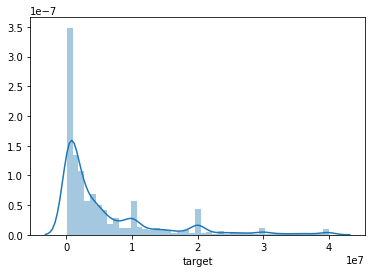

In [17]:
sns.distplot(df_train['target'])

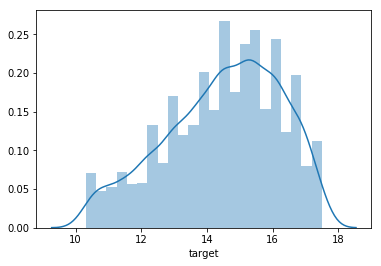

In [19]:
sns.distplot(np.log(1+df_train['target']))

Now, the distribution looks much more normal.

### Hypothesis: Are any of the columns having a constant value?

Since the dataset is so small and number of rows < number of columns.

In [20]:
constant_train = df_train.loc[:, (df_train == df_train.iloc[0]).all()].columns.tolist()
constant_test = df_test.loc[:, (df_test == df_test.iloc[0]).all()].columns.tolist()

In [21]:
len(constant_train)

256

In [22]:
len(constant_test)

0

There are 256 constant columns in the training dataset, but none in the test dataset. These constant columns are thus most likely an artifact of the way that the train and test sets were constructed. Let's remove them from out train set since they will not add any value.

In [24]:
columns_to_use = df_test.columns.tolist() # #Target variable is not considered
del columns_to_use[0] # #Remove 'ID'
columns_to_use = [x for x in columns_to_use if x not in constant_train] #Remove all 0 columns
len(columns_to_use)

4735

### Measure of sparsity

In [25]:
((df_train[columns_to_use].values.flatten())==0).mean()

0.9668404823200849

97% of values in the train set are zeros, indicating that it is a very sparse matrix

## Modelling

In [26]:
# #Log Transform the target variable
y = np.log(1+df_train.target.values)

In [27]:
X = lgb.Dataset(df_train[columns_to_use], y, feature_name = "auto")

### Model 1 - LightGBM (My Favourite :P)

In [28]:
params = {'boosting_type': 'gbdt', 
          'objective': 'regression', 
          'metric': 'rmse', 
          'learning_rate': 0.01, 
          'num_leaves': 100, 
          'feature_fraction': 0.4, 
          'bagging_fraction': 0.6, 
          'max_depth': 5, 
          'min_child_weight': 10}

In [30]:
clf = lgb.train(params,
        X,
        num_boost_round = 400,
        verbose_eval=True)

In [31]:
preds = clf.predict(df_test[columns_to_use])
preds

array([14.42327409, 14.42327409, 14.53871878, ..., 14.24748285,
       13.84353729, 14.42760526])

In [34]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
sample_submission.target = np.exp(preds)-1
sample_submission.to_csv('../submissions/model1_lightgbm_01.csv', index=False)
sample_submission.shape

(49342, 2)

In [37]:
nr_splits = 5
random_state = 1054

y_oof = np.zeros((y.shape[0]))
total_preds = 0


kf = KFold(n_splits=nr_splits, shuffle=True, random_state=random_state)
for i, (train_index, val_index) in enumerate(kf.split(y)):
    print('Fitting fold', i+1, 'out of', nr_splits)
    X_train, X_val  = df_train[columns_to_use].iloc[train_index], df_train[columns_to_use].iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    train = lgb.Dataset(X_train,y_train ,feature_name = "auto")
    val = lgb.Dataset(X_val ,y_val ,feature_name = "auto")
    clf = lgb.train(params,train,num_boost_round = 400,verbose_eval=True)
    
    total_preds += clf.predict(df_test[columns_to_use])/nr_splits
    pred_oof = clf.predict(X_val)
    y_oof[val_index] = pred_oof
    print('Fold error', np.sqrt(mean_squared_error(y_val, pred_oof)))

print('Total error', np.sqrt(mean_squared_error(y, y_oof)))

Fitting fold 1 out of 5
Fold error 1.4591105635600472
Fitting fold 2 out of 5
Fold error 1.4590817395947246
Fitting fold 3 out of 5
Fold error 1.470471946373302
Fitting fold 4 out of 5
Fold error 1.4985714284380764
Fitting fold 5 out of 5
Fold error 1.5322825994743314
Total error 1.484159995484231


In [43]:
sample_submission.target = np.exp(total_preds)-1
sample_submission.to_csv('../submissions/model1_lightgbm_02.csv', index=False)
sample_submission.head()

,ID,target
0,000137c73,1.838943e+06
1,00021489f,1.818344e+06
2,0004d7953,1.920972e+06
3,00056a333,3.520655e+06
4,00056d8eb,1.818344e+06
